# PlottingFigure4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis import *
import simulation

# Plotting Figure4

In [2]:
def readFigure4Data():
    """
    Returns the averaged contribution data. Relevant for figure 4. 
    The correct files have to be provided in the local directory
    
    One can change the generations over which is averaged down below with:
    startIndex, endIndex = (70000,generations)
    """

    generations = 100000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100
    numberOfGames = 1000
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = simulation.RiskCurve(3)
    heterogeneous = 1
    globalLambdaValue = 10.00
    
    filename = "figure4_"

    arrayRiskInRound = np.arange(1,5)# [1,2,3,4]
    arrayAlphaPoor = np.array([1.0,1.0,0.5,0.5])
    arrayAlphaRich = np.array([1.0,0.8,0.8,0.5])
    
    ContributionFig4 = np.empty(shape=(4,4,2,4))# [alphaConfiguration,riskInRound,wealth,round]
    
    startIndex, endIndex = (70000,generations)
    
    for row, (alphaPoor, alphaRich) in enumerate(zip(arrayAlphaPoor,arrayAlphaRich)):
        for column in range(4):
            riskInRound = simulation.RiskInRound(column+1)
            
            #### Load the file and the header #####
            StringName = "%s_%d_%d_%d_%d_%s_%0.2f_%0.2f_%d_%d_%d_%s_%d_%0.2f.dat" % (filename, generations, numberOfRounds, groupSize, popSize, riskInRound.name, alphaPoor, alphaRich, numberOfGames, wealthPoor, wealthRich, typeOfRiskCurve.name, heterogeneous, globalLambdaValue)
            HeaderFile = readHeader(filename=StringName)
            
            #### Compute the averaging over the relevant itterations #####
            # Uncomment the method that you want to use:
            
            # Read out summary
            #summary = readSummary(filename=StringName,heterogeneous=HeaderFile["heterogenous"])
            #thePoor = summary['AverageContributionPerRoundPoor']
            #theRich = summary['AverageContributionPerRoundRich']
            
            # Read out just the generations from start to end index
            ContributionArray = readContributionFileToData(fileName = StringName, heterogeneous = HeaderFile["heterogenous"], rounds = int(HeaderFile["number_of_rounds"]))
            Average = np.mean(ContributionArray[startIndex:endIndex,:,:],axis=0)
            thePoor = Average[1]
            theRich = Average[0]
            
            #### Save the contribution levels in the tensor #####
            ContributionFig4[row,column,0,:] = thePoor
            ContributionFig4[row,column,1,:] = theRich
    
    return ContributionFig4

ContributionFig4 = readFigure4Data()
ContributionFig4.shape

(4, 4, 2, 4)

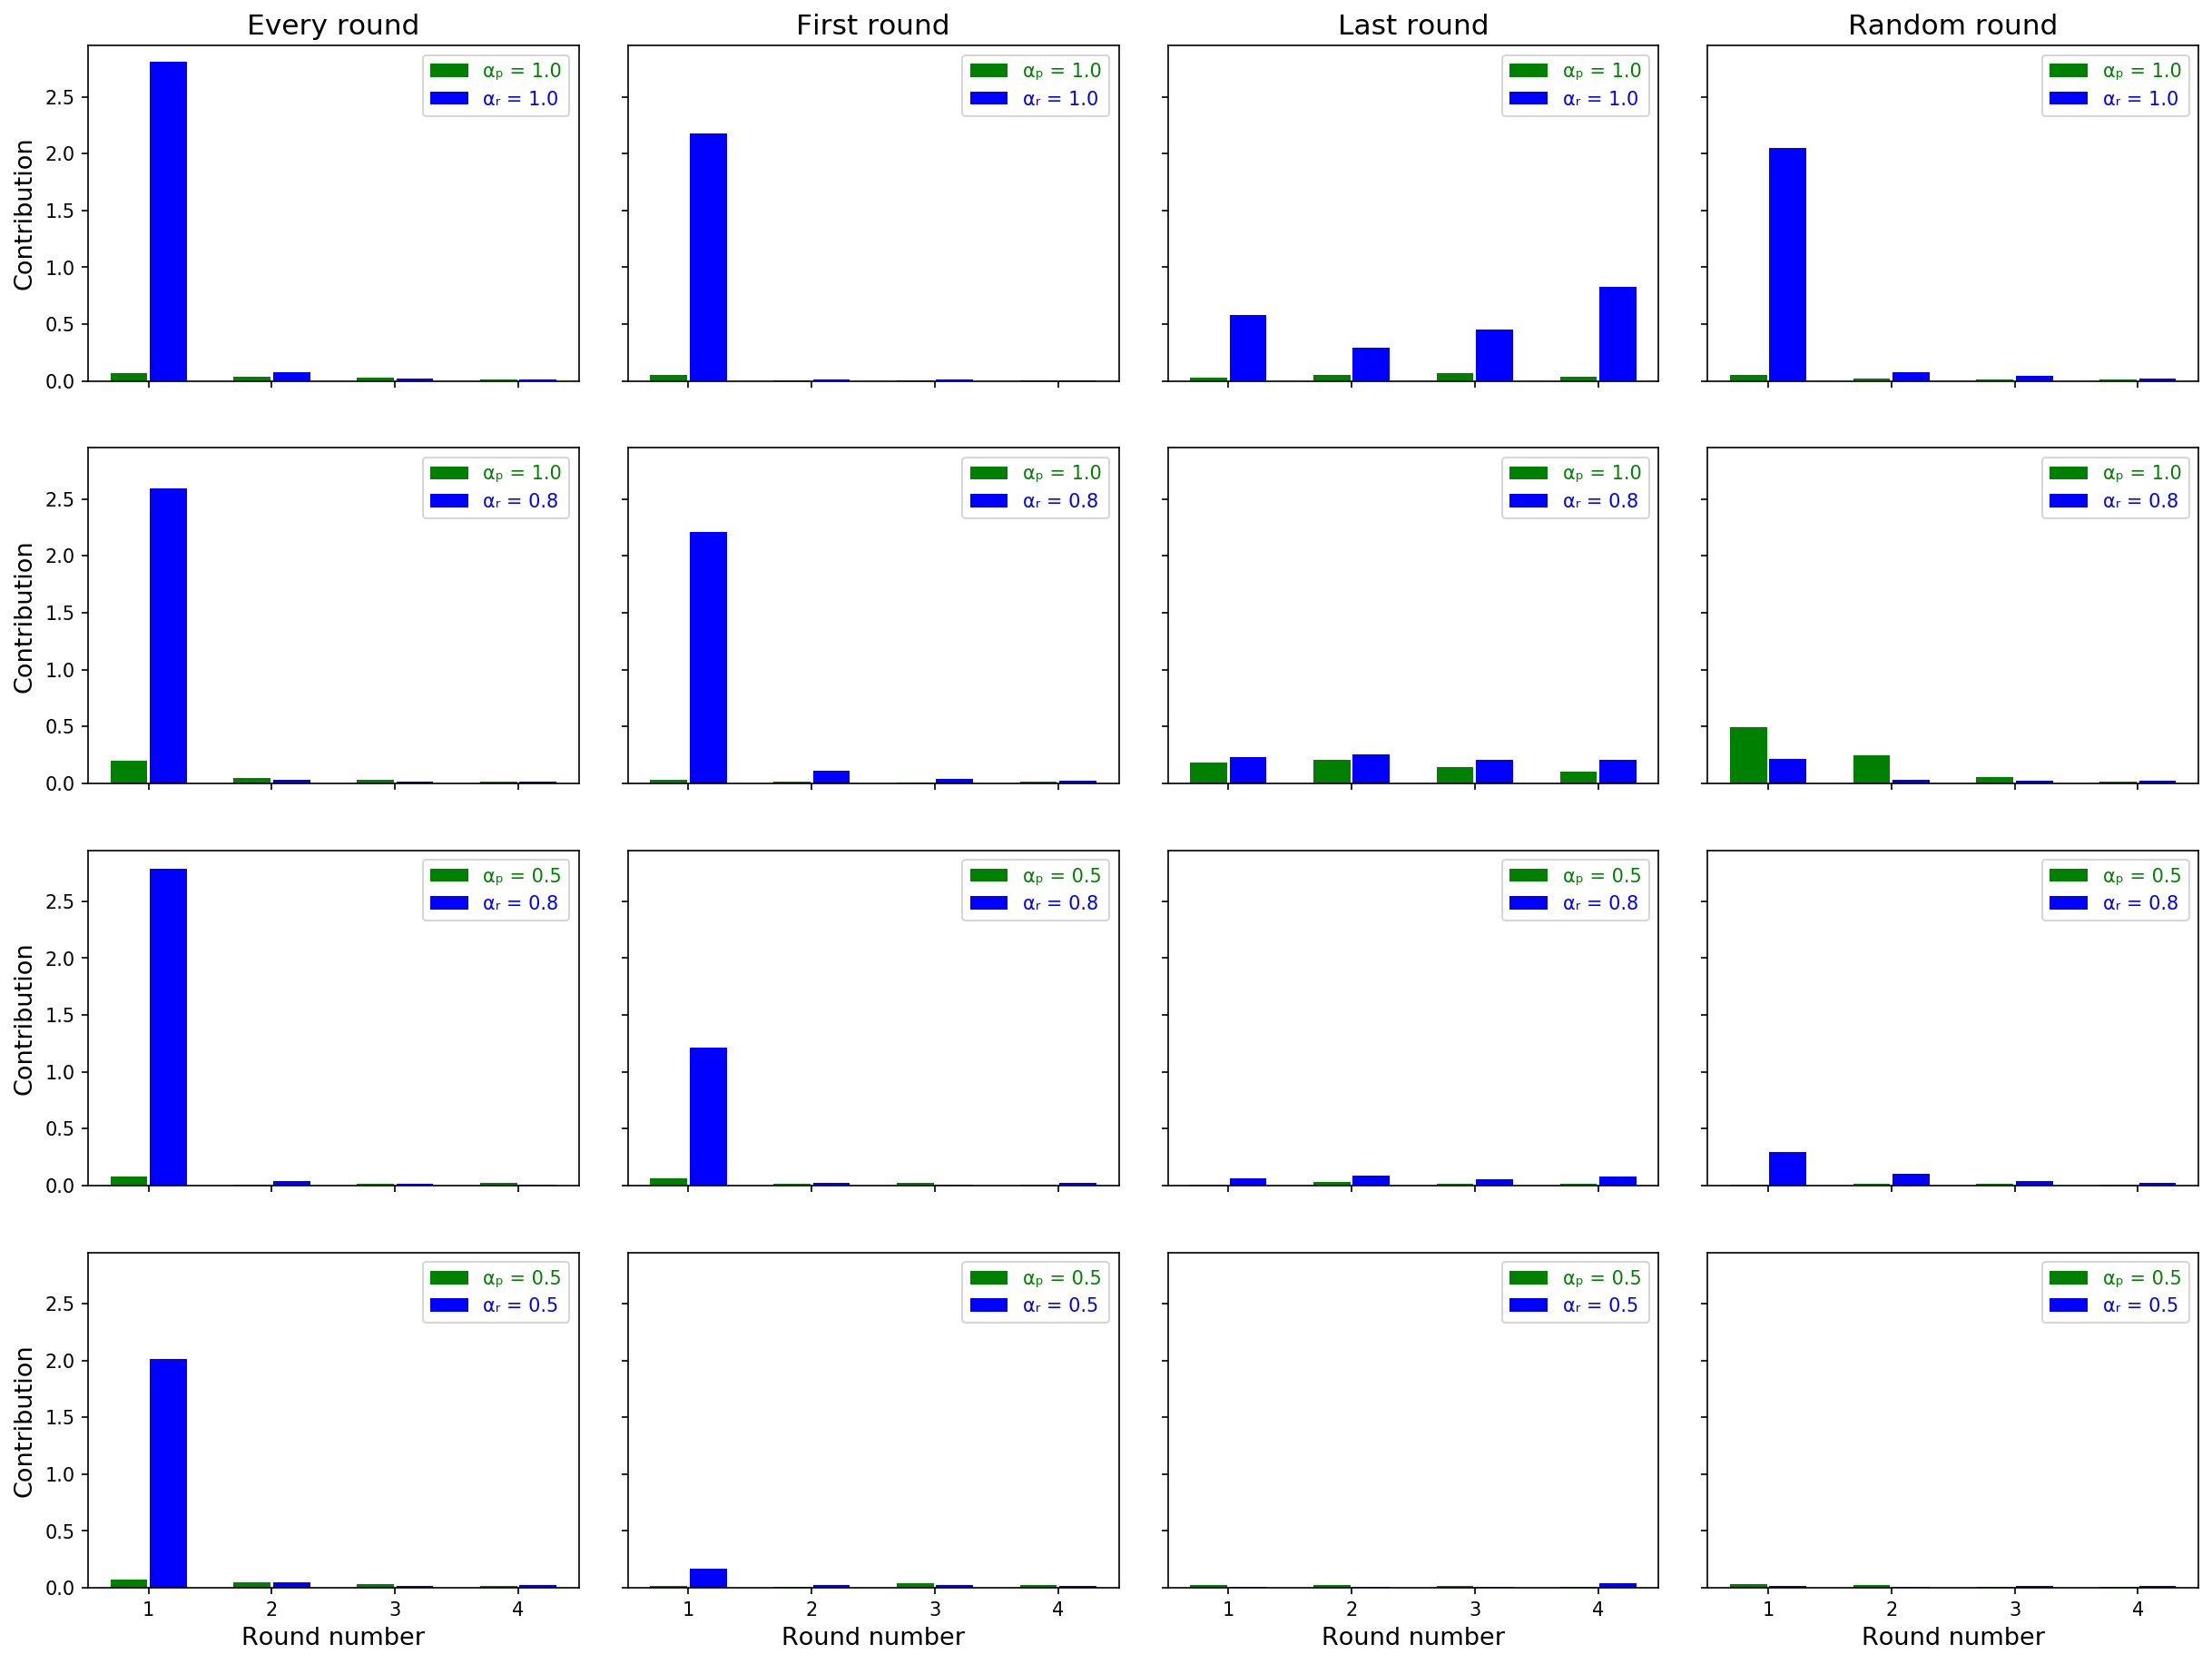

In [3]:
def plotFigure4(ContributionTensor):
    """ Plots Figure 4 of the paper
    Attribute:
        -ContributionTensor: a 4 dimensional numpy tensor where the indexes correspond to:
            ContributionTensor[alphaConfiguration,riskInRound,wealth,round]
    """
    fig, axs = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True,figsize=(20,15),dpi=150)
    
    # labels and titles
    Column_title = ["Every round", "First round", "Last round", "Random round"]
    y_axis_label = "Contribution"
    x_axis_label = "Round number"
    
    # use LaTeX fonts in the plot (doesn't want to work :( )
    #plt.rc('text', usetex=True)
    #plt.rc('font', family='serif')
    
    # Bar properties
    centreLocation = np.array([1,2,3,4]) # Centre location where the group of bars is going to be placed
    bar_width = 0.3 # Width of the bars
    gapInBetween = 0.02 # Gap inbetween the bars
    poorLocation = centreLocation - bar_width/2 - gapInBetween/2 # Have an extra -0.01 to create a gap between the bars
    richLocation = centreLocation + bar_width/2 + gapInBetween/2
    
    arrayAlphaPoor = np.array([1.0,1.0,0.5,0.5])
    arrayAlphaRich = np.array([1.0,0.8,0.8,0.5])
    
    for row, (axs_row,(alphaPoor,alphaRich)) in enumerate(zip(axs,zip(arrayAlphaPoor,arrayAlphaRich))):
        for column, ax  in enumerate(axs_row):
            ### Set labels and title
            if row == 0:
                ax.set_title(Column_title[column], fontsize=15)
            if column == 0:
                ax.set_ylabel(y_axis_label, fontsize=13)
            if row == 3:# aka the last row
                ax.set_xlabel(x_axis_label, fontsize=13)
                
            ### Set x-ticks correct
            ax.set_xticks(centreLocation)
            
            ### Plot the bars
            ax.bar(poorLocation, ContributionTensor[row,column,0,:], bar_width, color="g", label=f"\u03B1\u209A = {alphaPoor}")
            ax.bar(richLocation, ContributionTensor[row,column,1,:], bar_width, color="b", label=f"\u03B1ᵣ = {alphaRich}")
            
            ### Plot legend
            leg = ax.legend()
            # Set text of the color equal to that of the barr. 
            for patch,text in zip(leg.get_patches(), leg.get_texts()):
                text.set_color(patch.get_facecolor())
    
    plt.subplots_adjust( wspace=0.1, hspace=None)
    
    #plt.savefig("figure4.png")
    
plotFigure4(ContributionFig4)